**Analyzing Climate Change Data for Romania**


01. First, install essential libraries
02. installed OpenJDK 8


In [ ]:
# installs the pyspark library
!pip install pyspark --quiet
#installs PyDrive, a library for accessing Google Drive files
!pip install -U -q PyDrive --quiet
#installs OpenJDK 8 (Java Development Kit) without a graphical interface
!apt install openjdk-8-jdk-headless &> /dev/null

In [ ]:
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"

03. Created a Spark session.
 session name =  'Romania climate change

In [ ]:
from pyspark.sql import SparkSession

spark = SparkSession \
    .builder \
    .appName("Romania climate change") \
    .config("spark.ui.port", "4050") \
    .getOrCreate()

In [ ]:
# Load CSV into Spark DataFrame with inferred data types and headers
df = spark.read.csv('/content/Romania Climate Change from 1901-2020.csv', header=True, inferSchema=True) #Automatically infers the data types of each column.
df.show()

+-----+---------------+-------------+---------+------+-----+-----+-----+-----+-----+------+-----+-----+-----+-----+-----+-----+
|index| County/Country|     Variable|   Period|Annual|  Jan|  Feb|  Mar|  Apr|  May|   Jun|  Jul|  Aug|  Sep|  Oct|  Nov|  Dec|
+-----+---------------+-------------+---------+------+-----+-----+-----+-----+-----+------+-----+-----+-----+-----+-----+-----+
|    0|        Romania|Precipitation|1901-1930|643.09|36.68|31.14|34.81|51.33|73.27| 92.86|76.01|64.93|50.44|49.99|43.14|38.49|
|    1|       Botosani|Precipitation|1901-1930|527.69| 26.7|23.78|26.15| 45.6|60.45| 77.93|71.42|55.98|44.89| 34.6|32.24|27.93|
|    2|          Neamt|Precipitation|1901-1930|639.03|30.98|26.67| 31.6|53.65|77.13| 94.88|86.84|73.57|51.56|46.33|35.58|30.25|
|    3|Bistrita-nasaud|Precipitation|1901-1930|787.35|47.64|37.29|41.27|63.77|86.45|109.98|94.99|87.35|60.21|60.76| 50.7|46.94|
|    4|          Mures|Precipitation|1901-1930|683.61|37.94|29.43|33.47|54.44|77.86|100.17|88.94|76.63|5

In [ ]:
df.show(10, truncate=False)

+-----+---------------+-------------+---------+------+-----+-----+-----+-----+-----+------+-----+-----+-----+-----+-----+-----+
|index|County/Country |Variable     |Period   |Annual|Jan  |Feb  |Mar  |Apr  |May  |Jun   |Jul  |Aug  |Sep  |Oct  |Nov  |Dec  |
+-----+---------------+-------------+---------+------+-----+-----+-----+-----+-----+------+-----+-----+-----+-----+-----+-----+
|0    |Romania        |Precipitation|1901-1930|643.09|36.68|31.14|34.81|51.33|73.27|92.86 |76.01|64.93|50.44|49.99|43.14|38.49|
|1    |Botosani       |Precipitation|1901-1930|527.69|26.7 |23.78|26.15|45.6 |60.45|77.93 |71.42|55.98|44.89|34.6 |32.24|27.93|
|2    |Neamt          |Precipitation|1901-1930|639.03|30.98|26.67|31.6 |53.65|77.13|94.88 |86.84|73.57|51.56|46.33|35.58|30.25|
|3    |Bistrita-nasaud|Precipitation|1901-1930|787.35|47.64|37.29|41.27|63.77|86.45|109.98|94.99|87.35|60.21|60.76|50.7 |46.94|
|4    |Mures          |Precipitation|1901-1930|683.61|37.94|29.43|33.47|54.44|77.86|100.17|88.94|76.63|5

In [ ]:
df.columns

['index',
 'County/Country',
 'Variable',
 'Period',
 'Annual',
 'Jan',
 'Feb',
 'Mar',
 'Apr',
 'May',
 'Jun',
 'Jul',
 'Aug',
 'Sep',
 'Oct',
 'Nov',
 'Dec']

In [ ]:
df.dtypes

[('index', 'int'),
 ('County/Country', 'string'),
 ('Variable', 'string'),
 ('Period', 'string'),
 ('Annual', 'double'),
 ('Jan', 'double'),
 ('Feb', 'double'),
 ('Mar', 'double'),
 ('Apr', 'double'),
 ('May', 'double'),
 ('Jun', 'double'),
 ('Jul', 'double'),
 ('Aug', 'double'),
 ('Sep', 'double'),
 ('Oct', 'double'),
 ('Nov', 'double'),
 ('Dec', 'double')]

In [ ]:
df.printSchema()

root
 |-- index: integer (nullable = true)
 |-- County/Country: string (nullable = true)
 |-- Variable: string (nullable = true)
 |-- Period: string (nullable = true)
 |-- Annual: double (nullable = true)
 |-- Jan: double (nullable = true)
 |-- Feb: double (nullable = true)
 |-- Mar: double (nullable = true)
 |-- Apr: double (nullable = true)
 |-- May: double (nullable = true)
 |-- Jun: double (nullable = true)
 |-- Jul: double (nullable = true)
 |-- Aug: double (nullable = true)
 |-- Sep: double (nullable = true)
 |-- Oct: double (nullable = true)
 |-- Nov: double (nullable = true)
 |-- Dec: double (nullable = true)



In [ ]:
# Importing necessary types from PySpark SQL
from pyspark.sql.types import *
df.columns

['index',
 'County/Country',
 'Variable',
 'Period',
 'Annual',
 'Jan',
 'Feb',
 'Mar',
 'Apr',
 'May',
 'Jun',
 'Jul',
 'Aug',
 'Sep',
 'Oct',
 'Nov',
 'Dec']

In [ ]:
# Creating a list of the schema in the format column_name, data_type
labels = [
     ('index',IntegerType()),
     ('County/Country',StringType()),
     ('Variable',StringType()),
     ('Period',StringType()),
     ('Annual',StringType()),
     ('Jan',StringType()),
     ('Feb' , StringType()),
     ('Mar', StringType()),
     ('Apr', DoubleType()),
    ('May', DoubleType()),
 ('Jun', DoubleType()),
 ('Jul', DoubleType()),
 ('Aug', DoubleType()),
 ('Sep', DoubleType()),
 ('Oct', DoubleType()),
 ('Nov', DoubleType()),
 ('Dec', DoubleType()),
]

In [ ]:
# Creating the schema that will be passed when reading the csv
schema = StructType([StructField (x[0], x[1], True) for x in labels])
schema

StructType([StructField('index', IntegerType(), True), StructField('County/Country', StringType(), True), StructField('Variable', StringType(), True), StructField('Period', StringType(), True), StructField('Annual', StringType(), True), StructField('Jan', StringType(), True), StructField('Feb', StringType(), True), StructField('Mar', StringType(), True), StructField('Apr', DoubleType(), True), StructField('May', DoubleType(), True), StructField('Jun', DoubleType(), True), StructField('Jul', DoubleType(), True), StructField('Aug', DoubleType(), True), StructField('Sep', DoubleType(), True), StructField('Oct', DoubleType(), True), StructField('Nov', DoubleType(), True), StructField('Dec', DoubleType(), True)])

In [ ]:
df.show(truncate=False)

+-----+---------------+-------------+---------+------+-----+-----+-----+-----+-----+------+-----+-----+-----+-----+-----+-----+
|index|County/Country |Variable     |Period   |Annual|Jan  |Feb  |Mar  |Apr  |May  |Jun   |Jul  |Aug  |Sep  |Oct  |Nov  |Dec  |
+-----+---------------+-------------+---------+------+-----+-----+-----+-----+-----+------+-----+-----+-----+-----+-----+-----+
|0    |Romania        |Precipitation|1901-1930|643.09|36.68|31.14|34.81|51.33|73.27|92.86 |76.01|64.93|50.44|49.99|43.14|38.49|
|1    |Botosani       |Precipitation|1901-1930|527.69|26.7 |23.78|26.15|45.6 |60.45|77.93 |71.42|55.98|44.89|34.6 |32.24|27.93|
|2    |Neamt          |Precipitation|1901-1930|639.03|30.98|26.67|31.6 |53.65|77.13|94.88 |86.84|73.57|51.56|46.33|35.58|30.25|
|3    |Bistrita-nasaud|Precipitation|1901-1930|787.35|47.64|37.29|41.27|63.77|86.45|109.98|94.99|87.35|60.21|60.76|50.7 |46.94|
|4    |Mures          |Precipitation|1901-1930|683.61|37.94|29.43|33.47|54.44|77.86|100.17|88.94|76.63|5

In [ ]:
# Displaying the column name 'County/Country' as a string
# Column name is case sensitive in this usage
print('Weather Details')

# If there are special characters in the column name
df.select("`County/Country`").show(truncate=False)
# Displaying the contents of the selected column

Weather Details
+---------------+
|County/Country |
+---------------+
|Romania        |
|Botosani       |
|Neamt          |
|Bistrita-nasaud|
|Mures          |
|Bihor          |
|Mehedinti      |
|Maramures      |
|Iasi           |
|Bacau          |
|Arges          |
|Arad           |
|Ialomita       |
|Alba           |
|Hunedoara      |
|Harghita       |
|Gorj           |
|Giurgiu        |
|Galati         |
|Vrancea        |
+---------------+
only showing top 20 rows



In [ ]:
#Selecting Multiple Columns

# Column name is case sensitive in this usage
print('Weather Details')

df.select('index', '`County/Country`').show(truncate=False)

Weather Details
+-----+---------------+
|index|County/Country |
+-----+---------------+
|0    |Romania        |
|1    |Botosani       |
|2    |Neamt          |
|3    |Bistrita-nasaud|
|4    |Mures          |
|5    |Bihor          |
|6    |Mehedinti      |
|7    |Maramures      |
|8    |Iasi           |
|9    |Bacau          |
|10   |Arges          |
|11   |Arad           |
|12   |Ialomita       |
|13   |Alba           |
|14   |Hunedoara      |
|15   |Harghita       |
|16   |Gorj           |
|17   |Giurgiu        |
|18   |Galati         |
|19   |Vrancea        |
+-----+---------------+
only showing top 20 rows



In [ ]:
df.show()

+-----+---------------+-------------+---------+------+-----+-----+-----+-----+-----+------+-----+-----+-----+-----+-----+-----+
|index| County/Country|     Variable|   Period|Annual|  Jan|  Feb|  Mar|  Apr|  May|   Jun|  Jul|  Aug|  Sep|  Oct|  Nov|  Dec|
+-----+---------------+-------------+---------+------+-----+-----+-----+-----+-----+------+-----+-----+-----+-----+-----+-----+
|    0|        Romania|Precipitation|1901-1930|643.09|36.68|31.14|34.81|51.33|73.27| 92.86|76.01|64.93|50.44|49.99|43.14|38.49|
|    1|       Botosani|Precipitation|1901-1930|527.69| 26.7|23.78|26.15| 45.6|60.45| 77.93|71.42|55.98|44.89| 34.6|32.24|27.93|
|    2|          Neamt|Precipitation|1901-1930|639.03|30.98|26.67| 31.6|53.65|77.13| 94.88|86.84|73.57|51.56|46.33|35.58|30.25|
|    3|Bistrita-nasaud|Precipitation|1901-1930|787.35|47.64|37.29|41.27|63.77|86.45|109.98|94.99|87.35|60.21|60.76| 50.7|46.94|
|    4|          Mures|Precipitation|1901-1930|683.61|37.94|29.43|33.47|54.44|77.86|100.17|88.94|76.63|5

In [ ]:
df = df.drop('index')

In [ ]:
df.show()

+---------------+-------------+---------+------+-----+-----+-----+-----+-----+------+-----+-----+-----+-----+-----+-----+
| County/Country|     Variable|   Period|Annual|  Jan|  Feb|  Mar|  Apr|  May|   Jun|  Jul|  Aug|  Sep|  Oct|  Nov|  Dec|
+---------------+-------------+---------+------+-----+-----+-----+-----+-----+------+-----+-----+-----+-----+-----+-----+
|        Romania|Precipitation|1901-1930|643.09|36.68|31.14|34.81|51.33|73.27| 92.86|76.01|64.93|50.44|49.99|43.14|38.49|
|       Botosani|Precipitation|1901-1930|527.69| 26.7|23.78|26.15| 45.6|60.45| 77.93|71.42|55.98|44.89| 34.6|32.24|27.93|
|          Neamt|Precipitation|1901-1930|639.03|30.98|26.67| 31.6|53.65|77.13| 94.88|86.84|73.57|51.56|46.33|35.58|30.25|
|Bistrita-nasaud|Precipitation|1901-1930|787.35|47.64|37.29|41.27|63.77|86.45|109.98|94.99|87.35|60.21|60.76| 50.7|46.94|
|          Mures|Precipitation|1901-1930|683.61|37.94|29.43|33.47|54.44|77.86|100.17|88.94|76.63|53.91|54.49|40.22|36.12|
|          Bihor|Precipi

In [ ]:
from pyspark.sql.functions import monotonically_increasing_id

#  Add the new column with sequential numbers
df = df.withColumn("RowNumber", monotonically_increasing_id() + 1)

#  Reorder the columns to make "RowNumber" the first column
# Get a list of columns with "RowNumber" at the start
new_column_order = ["RowNumber"] + [col for col in df.columns if col != "RowNumber"]

#  Select columns in the new order to update the DataFrame
df = df.select(new_column_order)

# Display the updated DataFrame to verify "RowNumber" is the first column
df.show(truncate=False)


+---------+---------------+-------------+---------+------+-----+-----+-----+-----+-----+------+-----+-----+-----+-----+-----+-----+
|RowNumber|County/Country |Variable     |Period   |Annual|Jan  |Feb  |Mar  |Apr  |May  |Jun   |Jul  |Aug  |Sep  |Oct  |Nov  |Dec  |
+---------+---------------+-------------+---------+------+-----+-----+-----+-----+-----+------+-----+-----+-----+-----+-----+-----+
|1        |Romania        |Precipitation|1901-1930|643.09|36.68|31.14|34.81|51.33|73.27|92.86 |76.01|64.93|50.44|49.99|43.14|38.49|
|2        |Botosani       |Precipitation|1901-1930|527.69|26.7 |23.78|26.15|45.6 |60.45|77.93 |71.42|55.98|44.89|34.6 |32.24|27.93|
|3        |Neamt          |Precipitation|1901-1930|639.03|30.98|26.67|31.6 |53.65|77.13|94.88 |86.84|73.57|51.56|46.33|35.58|30.25|
|4        |Bistrita-nasaud|Precipitation|1901-1930|787.35|47.64|37.29|41.27|63.77|86.45|109.98|94.99|87.35|60.21|60.76|50.7 |46.94|
|5        |Mures          |Precipitation|1901-1930|683.61|37.94|29.43|33.47|

In [ ]:
#Renaming a column in PySpark
df = df.withColumnRenamed('RowNumber', 'Number')
df.select('Number').show(truncate=False)

+------+
|Number|
+------+
|1     |
|2     |
|3     |
|4     |
|5     |
|6     |
|7     |
|8     |
|9     |
|10    |
|11    |
|12    |
|13    |
|14    |
|15    |
|16    |
|17    |
|18    |
|19    |
|20    |
+------+
only showing top 20 rows



In [ ]:
df.show(truncate=False)

+------+---------------+-------------+---------+------+-----+-----+-----+-----+-----+------+-----+-----+-----+-----+-----+-----+
|Number|County/Country |Variable     |Period   |Annual|Jan  |Feb  |Mar  |Apr  |May  |Jun   |Jul  |Aug  |Sep  |Oct  |Nov  |Dec  |
+------+---------------+-------------+---------+------+-----+-----+-----+-----+-----+------+-----+-----+-----+-----+-----+-----+
|1     |Romania        |Precipitation|1901-1930|643.09|36.68|31.14|34.81|51.33|73.27|92.86 |76.01|64.93|50.44|49.99|43.14|38.49|
|2     |Botosani       |Precipitation|1901-1930|527.69|26.7 |23.78|26.15|45.6 |60.45|77.93 |71.42|55.98|44.89|34.6 |32.24|27.93|
|3     |Neamt          |Precipitation|1901-1930|639.03|30.98|26.67|31.6 |53.65|77.13|94.88 |86.84|73.57|51.56|46.33|35.58|30.25|
|4     |Bistrita-nasaud|Precipitation|1901-1930|787.35|47.64|37.29|41.27|63.77|86.45|109.98|94.99|87.35|60.21|60.76|50.7 |46.94|
|5     |Mures          |Precipitation|1901-1930|683.61|37.94|29.43|33.47|54.44|77.86|100.17|88.94

In [ ]:
from pyspark.sql.functions import col, concat, lit

# Creating the 'Number_country' column by concatenating 'index' and 'County/Country' with a space
# Use 'Number' instead of 'RowNumber' as it was renamed previously
df = df.withColumn('Number_country', concat(col("Number"), lit(" "), col("County/Country")))
# Display the first 5 rows without truncation
df.show(15, truncate=False)

+------+---------------+-------------+---------+------+-----+-----+-----+-----+-----+------+-----+-----+-----+-----+-----+-----+-----------------+
|Number|County/Country |Variable     |Period   |Annual|Jan  |Feb  |Mar  |Apr  |May  |Jun   |Jul  |Aug  |Sep  |Oct  |Nov  |Dec  |Number_country   |
+------+---------------+-------------+---------+------+-----+-----+-----+-----+-----+------+-----+-----+-----+-----+-----+-----+-----------------+
|1     |Romania        |Precipitation|1901-1930|643.09|36.68|31.14|34.81|51.33|73.27|92.86 |76.01|64.93|50.44|49.99|43.14|38.49|1 Romania        |
|2     |Botosani       |Precipitation|1901-1930|527.69|26.7 |23.78|26.15|45.6 |60.45|77.93 |71.42|55.98|44.89|34.6 |32.24|27.93|2 Botosani       |
|3     |Neamt          |Precipitation|1901-1930|639.03|30.98|26.67|31.6 |53.65|77.13|94.88 |86.84|73.57|51.56|46.33|35.58|30.25|3 Neamt          |
|4     |Bistrita-nasaud|Precipitation|1901-1930|787.35|47.64|37.29|41.27|63.77|86.45|109.98|94.99|87.35|60.21|60.76|50

In [ ]:
# Group By a column in PySpark
df_grouped = df.groupBy('Variable').count()
df_grouped.show()

+----------------+-----+
|        Variable|count|
+----------------+-----+
| Max-Temperature|  168|
| Min-Temperature|  167|
|   Precipitation|  168|
|Mean-Temperature|  168|
+----------------+-----+



In [ ]:
df.show(truncate=False)

+------+---------------+-------------+---------+------+-----+-----+-----+-----+-----+------+-----+-----+-----+-----+-----+-----+-----------------+
|Number|County/Country |Variable     |Period   |Annual|Jan  |Feb  |Mar  |Apr  |May  |Jun   |Jul  |Aug  |Sep  |Oct  |Nov  |Dec  |Number_country   |
+------+---------------+-------------+---------+------+-----+-----+-----+-----+-----+------+-----+-----+-----+-----+-----+-----+-----------------+
|1     |Romania        |Precipitation|1901-1930|643.09|36.68|31.14|34.81|51.33|73.27|92.86 |76.01|64.93|50.44|49.99|43.14|38.49|1 Romania        |
|2     |Botosani       |Precipitation|1901-1930|527.69|26.7 |23.78|26.15|45.6 |60.45|77.93 |71.42|55.98|44.89|34.6 |32.24|27.93|2 Botosani       |
|3     |Neamt          |Precipitation|1901-1930|639.03|30.98|26.67|31.6 |53.65|77.13|94.88 |86.84|73.57|51.56|46.33|35.58|30.25|3 Neamt          |
|4     |Bistrita-nasaud|Precipitation|1901-1930|787.35|47.64|37.29|41.27|63.77|86.45|109.98|94.99|87.35|60.21|60.76|50

In [ ]:
# Sort the DataFrame by the "County/Country" column in ascending order
sorted_county_df = df.orderBy("County/Country", ascending=True)

# Display the sorted DataFrame
sorted_county_df.show()


+------+--------------+----------------+---------+------+-----+-----+-----+-----+-----+------+-----+-----+-----+-----+-----+-----+--------------+
|Number|County/Country|        Variable|   Period|Annual|  Jan|  Feb|  Mar|  Apr|  May|   Jun|  Jul|  Aug|  Sep|  Oct|  Nov|  Dec|Number_country|
+------+--------------+----------------+---------+------+-----+-----+-----+-----+-----+------+-----+-----+-----+-----+-----+-----+--------------+
|    14|          Alba|   Precipitation|1901-1930|762.71|39.65|35.49| 37.7|60.97|88.64|115.02|95.09| 83.9|60.79|60.66| 43.6| 41.2|       14 Alba|
|    56|          Alba|   Precipitation|1931-1960|753.86|41.27|40.86|36.38|57.83|92.55|111.07|93.32|80.04|52.63|59.23|46.47| 42.2|       56 Alba|
|    98|          Alba|   Precipitation|1961-1990|736.05|39.69|36.23|38.13|58.78|90.76|111.56|97.38|79.21|50.53|45.09|43.55|45.13|       98 Alba|
|   140|          Alba|   Precipitation|1991-2020|767.26|36.87|37.74|41.79|57.89|91.51|110.12|100.9|76.68|67.14|60.84|41.03|

In [ ]:
# Sort the DataFrame by the "County/Country" column in descending order
sorted_county_df = df.orderBy("County/Country", ascending=False)

# Display the sorted DataFrame
sorted_county_df.show()


+------+--------------+----------------+---------+------+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+--------------+
|Number|County/Country|        Variable|   Period|Annual|  Jan|  Feb|  Mar|  Apr|  May|  Jun|  Jul|  Aug|  Sep|  Oct|  Nov|  Dec|Number_country|
+------+--------------+----------------+---------+------+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+--------------+
|   104|       Vrancea|   Precipitation|1961-1990|619.31|34.26|32.44|33.02|51.89|75.76|89.68|79.37|64.08| 49.4|34.06| 38.9|36.45|   104 Vrancea|
|   188|       Vrancea|Mean-Temperature|1901-1930|  8.37|-4.19|-2.94| 2.93| 8.76|14.45|17.68|19.59|18.88|14.75| 9.16| 3.18|-1.75|   188 Vrancea|
|    62|       Vrancea|   Precipitation|1931-1960|601.02|35.74|30.57|26.71|48.97|72.32|93.56|69.86|64.97|39.68|43.44|41.31| 33.9|    62 Vrancea|
|    20|       Vrancea|   Precipitation|1901-1930| 601.4|32.84|26.72|31.54|47.42|72.31|89.82|76.79|60.92|46.01|43.47|40.66|32.91| 

In [ ]:
from pyspark.sql.functions import max as F_max, min as F_min

#  Group by "County/Country" and calculate the max and min of "Annual" precipitation
country_precipitation_stats = df.groupBy("County/Country").agg(
    F_max("Annual").alias("Max_Annual_Precipitation"),
    F_min("Annual").alias("Min_Annual_Precipitation")
)

#  Display the result
country_precipitation_stats.show(truncate=False)


+--------------+------------------------+------------------------+
|County/Country|Max_Annual_Precipitation|Min_Annual_Precipitation|
+--------------+------------------------+------------------------+
|Brasov        |695.8                   |1.38                    |
|Mehedinti     |686.54                  |5.68                    |
|Gorj          |795.48                  |3.34                    |
|Iasi          |559.93                  |4.18                    |
|Neamt         |643.56                  |1.23                    |
|Suceava       |725.28                  |0.58                    |
|Timis         |627.69                  |6.16                    |
|Valcea        |764.84                  |2.86                    |
|Alba          |767.26                  |2.11                    |
|Bucuresti     |587.03                  |5.47                    |
|Calarasi      |532.95                  |5.87                    |
|Botosani      |540.96                  |4.22                 

In [ ]:
#filter rows where the value in the "Annual" column is greater than 800:
filtered_df = df.filter(df["Annual"] > 800)
filtered_df.show()


+------+--------------+-------------+---------+------+-----+-----+-----+-----+-----+------+------+-----+-----+-----+-----+-----+-----------------+
|Number|County/Country|     Variable|   Period|Annual|  Jan|  Feb|  Mar|  Apr|  May|   Jun|   Jul|  Aug|  Sep|  Oct|  Nov|  Dec|   Number_country|
+------+--------------+-------------+---------+------+-----+-----+-----+-----+-----+------+------+-----+-----+-----+-----+-----+-----------------+
|     8|     Maramures|Precipitation|1901-1930|870.13|53.48|44.22|48.22| 70.4|91.77|117.75| 98.24|97.32|67.59|66.91| 58.6|55.64|      8 Maramures|
|    15|     Hunedoara|Precipitation|1901-1930|801.01|42.16|39.45|40.01|63.79|93.63| 119.8|  95.7|86.04|65.62|62.55|47.04|45.22|     15 Hunedoara|
|    50|     Maramures|Precipitation|1931-1960|842.96|53.05|50.64|44.08|62.58|90.19|114.34| 98.54|94.48|56.91|64.85|57.81|55.49|     50 Maramures|
|    57|     Hunedoara|Precipitation|1931-1960|801.05|43.88|45.83|40.01|61.12| 99.4|117.06| 94.27|81.42|57.55| 62.0|51

In [ ]:
# the value in the "Annual" column is greater than 700 and the "County/Country" column is "Maramures":
filtered_df = df.filter((df["Annual"] > 700) & (df["County/Country"] == "Maramures"))
filtered_df.show()


+------+--------------+-------------+---------+------+-----+-----+-----+-----+-----+------+------+-----+-----+-----+-----+-----+--------------+
|Number|County/Country|     Variable|   Period|Annual|  Jan|  Feb|  Mar|  Apr|  May|   Jun|   Jul|  Aug|  Sep|  Oct|  Nov|  Dec|Number_country|
+------+--------------+-------------+---------+------+-----+-----+-----+-----+-----+------+------+-----+-----+-----+-----+-----+--------------+
|     8|     Maramures|Precipitation|1901-1930|870.13|53.48|44.22|48.22| 70.4|91.77|117.75| 98.24|97.32|67.59|66.91| 58.6|55.64|   8 Maramures|
|    50|     Maramures|Precipitation|1931-1960|842.96|53.05|50.64|44.08|62.58|90.19|114.34| 98.54|94.48|56.91|64.85|57.81|55.49|  50 Maramures|
|    92|     Maramures|Precipitation|1961-1990|829.14|51.58|43.61|47.46| 64.1|95.95|117.89| 103.3|87.81|53.67|48.11|54.65|61.02|  92 Maramures|
|   134|     Maramures|Precipitation|1991-2020|843.74| 47.9|45.93|50.89|61.79|96.14|108.59|103.74|84.48|68.24|64.18|52.18|59.68| 134 Mar

**Calculate the Average Annual Precipitation for each Period** (LINE CHART )



*   x-axis represents each period
*   y-axis shows the average annual precipitation




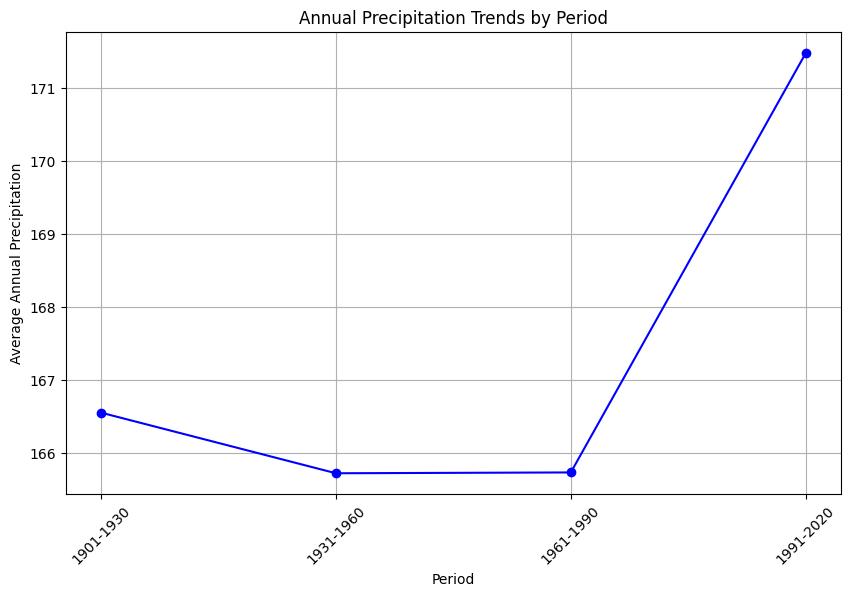

In [ ]:
import matplotlib.pyplot as plt
from pyspark.sql.functions import avg

# Step 1: Calculate average annual precipitation by period
# Group by 'Period' and calculate the average 'Annual' precipitation
period_avg_precipitation = df.groupBy("Period").agg(avg("Annual").alias("Average_Annual_Precipitation"))

# Step 2: Collect the data to a Pandas DataFrame for plotting
period_data = period_avg_precipitation.toPandas()

# Step 3: Sort the data by Period for a proper trend line
period_data = period_data.sort_values("Period")

# Step 4: Plot the data
plt.figure(figsize=(10, 6))
plt.plot(period_data["Period"], period_data["Average_Annual_Precipitation"], marker='o', color='b', linestyle='-')
plt.xlabel("Period")
plt.ylabel("Average Annual Precipitation")
plt.title("Annual Precipitation Trends by Period")
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(True)
plt.show()


**Top 5 Counties with Highest Annual Precipitation** (BAR CHART)

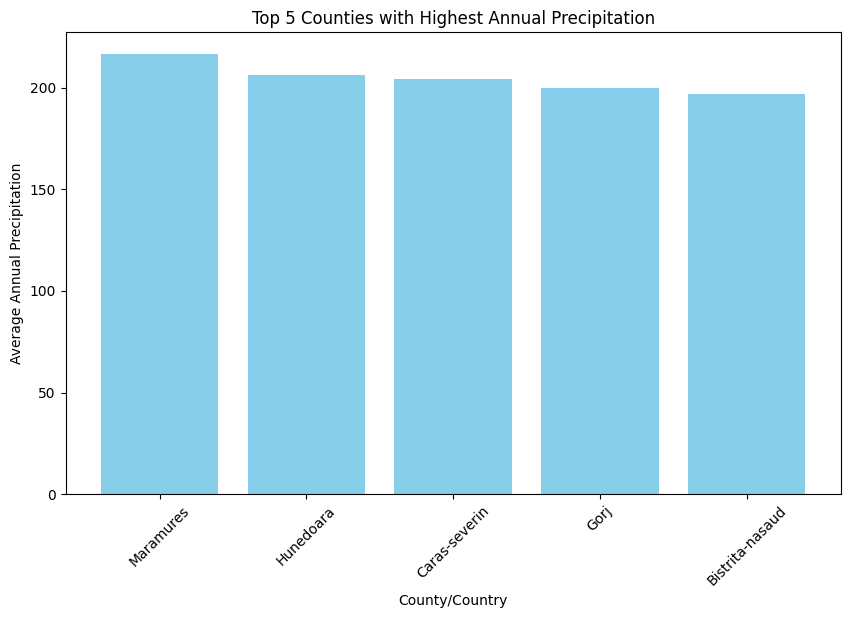

In [ ]:
# Importing the necessary library for data visualization
import matplotlib.pyplot as plt
# Importing the 'avg' function from PySpark SQL functions for calculating the average of a column
from pyspark.sql.functions import avg

# Group data by County/Country and calculate the average annual precipitation
country_avg_precipitation = df.groupBy("County/Country").agg(avg("Annual").alias("Average_Annual_Precipitation"))

# Sort by average precipitation in descending order and select the top 5 counties
top5_countries = country_avg_precipitation.orderBy("Average_Annual_Precipitation", ascending=False).limit(5)

# Convert to Pandas DataFrame for plotting
top5_data = top5_countries.toPandas()

# Plotting
plt.figure(figsize=(10, 6))  # Set figure size
plt.bar(top5_data["County/Country"], top5_data["Average_Annual_Precipitation"], color='skyblue')  # Create bar chart
plt.xlabel("County/Country")  # Label x-axis
plt.ylabel("Average Annual Precipitation")  # Label y-axis
plt.title("Top 5 Counties with Highest Annual Precipitation")  # Title for the chart
plt.xticks(rotation=45)  # Rotate x-axis labels for readability
plt.show()  # Display chart


**Top 5 Counties with Highest Annual Precipitation** (PIE CHART)

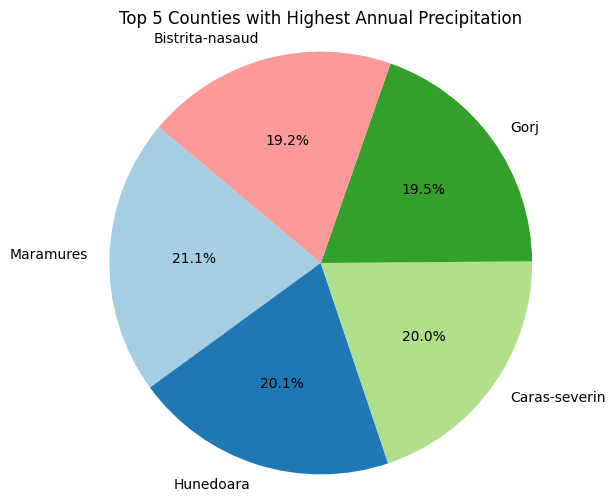

In [ ]:
# Importing the necessary library for data visualization
import matplotlib.pyplot as plt
# Importing the 'avg' function from PySpark SQL functions for calculating the average of a column
from pyspark.sql.functions import avg

# Group data by County/Country and calculate the average annual precipitation
country_avg_precipitation = df.groupBy("County/Country").agg(avg("Annual").alias("Average_Annual_Precipitation"))

# Sort by average precipitation in descending order and select the top 5 counties
top5_countries = country_avg_precipitation.orderBy("Average_Annual_Precipitation", ascending=False).limit(5)

# Convert to Pandas DataFrame for plotting
top5_data = top5_countries.toPandas()

# Plotting
plt.figure(figsize=(6, 6))  # Set figure size for the pie chart
plt.pie(top5_data["Average_Annual_Precipitation"], labels=top5_data["County/Country"], autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title("Top 5 Counties with Highest Annual Precipitation")  # Title for the chart
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()  # Display chart
